In [ ]:
!pip install tensorflow matplotlib


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
dataset_path = '/content/drive/MyDrive/GarbageClassification'


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
image_size = (150, 150)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 550s 9s/step - accuracy: 0.2057 - loss: 1.9156 - val_accuracy: 0.3797 - val_loss: 1.4896
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.4200 - loss: 1.3915 - val_accuracy: 0.4513 - val_loss: 1.3817
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.4952 - loss: 1.2374 - val_accuracy: 0.4175 - val_loss: 1.3605
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.5608 - loss: 1.1443 - val_accuracy: 0.4771 - val_loss: 1.3205
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.5772 - loss: 1.0683 - val_accuracy: 0.4672 - val_loss: 1.4254
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5977 - loss: 1.0283 - val_accuracy: 0.5030 - val_loss: 1.2593
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.6700 - loss: 0.8697 - val_accuracy: 0.5427 - val_loss: 1.2005
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.6970 - loss: 0.8118 - val_accuracy: 0.5427 - val_los

In [ ]:
model.save("/content/drive/MyDrive/garbage_classifier_model.h5")


In [ ]:
from tensorflow.keras.preprocessing import image

test_path = "/content/drive/MyDrive/glass7.jpg"
img = image.load_img(test_path, target_size=image_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) / 255.0

pred = model.predict(x)
predicted_class = list(train_generator.class_indices.keys())[np.argmax(pred)]
print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Predicted Class: glass


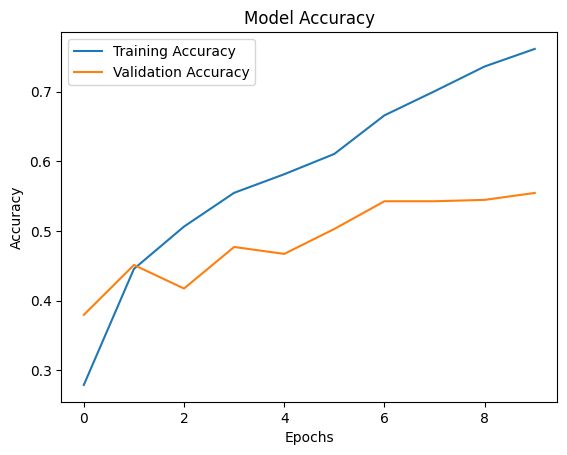

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


/tmp/ipython-input-10-2218690211.py:29: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


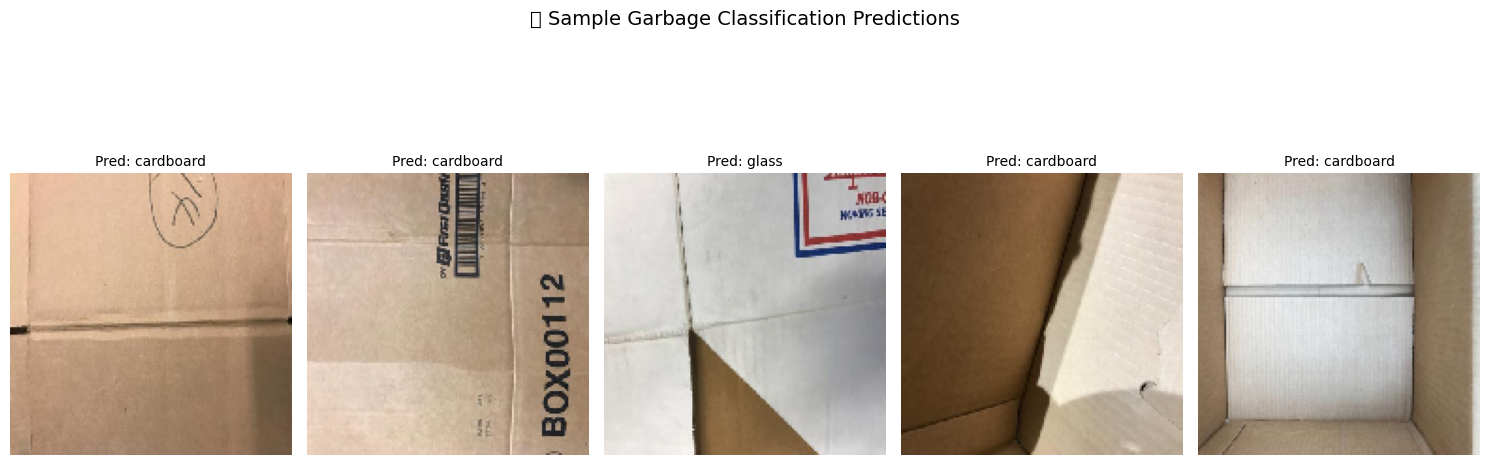

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
class_labels = list(train_generator.class_indices.keys())
plt.figure(figsize=(15, 6))

for i in range(5):
    img_path = val_generator.filepaths[i]
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)
    predicted_class = class_labels[np.argmax(pred)]
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Pred: {predicted_class}", fontsize=10)
    plt.axis('off')

plt.suptitle("🔍 Sample Garbage Classification Predictions", fontsize=14)
plt.tight_layout()
plt.show()
